In [1]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from infer import QRDefective

In [2]:
# helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

Evaluating Model: qrcode-unet-mbv3-100.3.onnx
Input & Output:   ['N', 1, 'H', 'W'] ['N', 1, 'H', 'W']
Total Calls:      1
[CPU] BS: 1 Elapsed Time PreProcess:  1.373291 ms
[CPU] BS: 1 Elapsed Time Forward:     45.984745 ms
[CPU] BS: 1 Elapsed Time PostProcess: 0.126362 ms
None
(1, 320, 320) 0 1


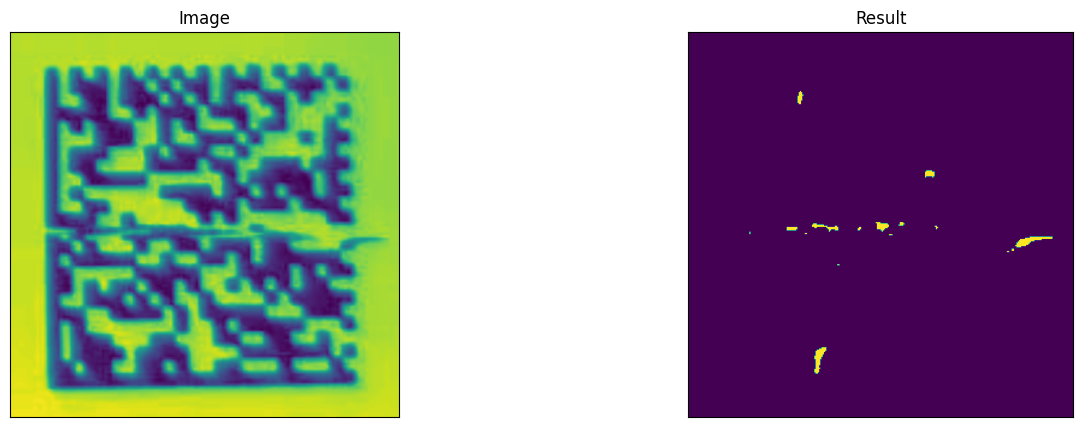

In [10]:
model = QRDefective("../data/qrcode-unet-mbv3-100.3.onnx")
# gray = cv2.imread("QRCodeDatasets/defective/000126.png", 0)
gray = cv2.imread("/workspace/segmentation_models.pytorch/data/WechatIMG68.png", 0)
result = model(gray)
print(model.computation_metrics())
print(result.shape, result.min(), result.max())
visualize(image=gray, result=result[0])